# MedGemma 1.5: Next-Gen Medical AI with 3D Imaging

**Video tutorial**: [Link to YouTube video will be added after recording]

This notebook demonstrates how to use Google's MedGemma 1.5, the first open-source multimodal AI model with 3D medical imaging capabilities.

## Overview

MedGemma 1.5 (released Jan 13, 2026) is an open-source medical AI that supports:
- 2D medical imaging (X-rays, dermatology, histopathology)
- **3D volumetric imaging** (CT/MRI scans) - NEW in 1.5
- Medical Q&A and document understanding
- Anatomical localization and longitudinal comparison

**Key improvements over v1.0**:
- +14% MRI accuracy, +3% CT accuracy
- +22% EHR question-answering
- +35% anatomical localization

**Free for research and commercial use!**

---

## Performance Benchmarks

MedGemma 1.5 delivers significant improvements over the previous version across both text and imaging tasks. Below are the official benchmark results from Google Research.

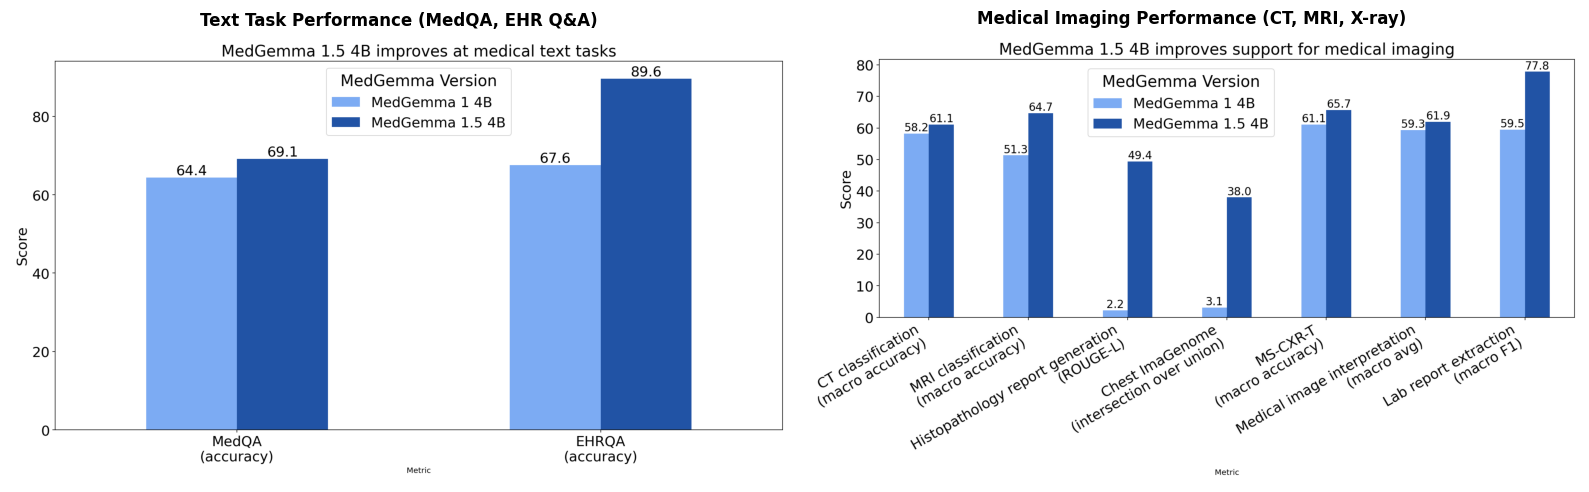


📊 Source: Google Research Blog - MedGemma 1.5 Release
   https://research.google/blog/next-generation-medical-image-interpretation-with-medgemma-15-and-medical-speech-to-text-with-medasr/

✨ Key Improvements (v1.0 → v1.5):
   • MRI classification: +14% (51% → 65%)
   • CT classification: +3% (58% → 61%)
   • Medical Q&A (MedQA): +5% (64% → 69%)
   • EHR question-answering: +22% (68% → 90%)
   • Anatomical localization: +35% (3% → 38% IOU)

🎯 vs GPT-4: Fine-tuned MedGemma achieves 80.4% vs GPT-4's 69.6% on medical imaging tasks


In [1]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Display official benchmark images from Google Research
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Text Performance Benchmarks
text_url = "https://storage.googleapis.com/gweb-research2023-media/original_images/MedGemma15-6-Text.png"
text_img = Image.open(BytesIO(requests.get(text_url).content))
ax1.imshow(text_img)
ax1.axis('off')
ax1.set_title('Text Task Performance (MedQA, EHR Q&A)', fontsize=12, fontweight='bold', pad=10)

# Imaging Performance Benchmarks
imaging_url = "https://storage.googleapis.com/gweb-research2023-media/original_images/MedGemma15-4-Imaging.png"
imaging_img = Image.open(BytesIO(requests.get(imaging_url).content))
ax2.imshow(imaging_img)
ax2.axis('off')
ax2.set_title('Medical Imaging Performance (CT, MRI, X-ray)', fontsize=12, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

# Source citation
print("\n📊 Source: Google Research Blog - MedGemma 1.5 Release")
print("   https://research.google/blog/next-generation-medical-image-interpretation-with-medgemma-15-and-medical-speech-to-text-with-medasr/")
print("\n✨ Key Improvements (v1.0 → v1.5):")
print("   • MRI classification: +14% (51% → 65%)")
print("   • CT classification: +3% (58% → 61%)")
print("   • Medical Q&A (MedQA): +5% (64% → 69%)")
print("   • EHR question-answering: +22% (68% → 90%)")
print("   • Anatomical localization: +35% (3% → 38% IOU)")
print("\n🎯 vs GPT-4: Fine-tuned MedGemma achieves 80.4% vs GPT-4's 69.6% on medical imaging tasks")

## Installation

Install required packages:

In [2]:
!pip install -q transformers pillow torch matplotlib requests huggingface_hub

## Setup

Import libraries and load the MedGemma 1.5 model. The model is about 8GB, so first download takes a few minutes.

**Note**: The cell checks if the model is already loaded to prevent Out of Memory errors when re-running. To force reload: `del pipe` then `torch.cuda.empty_cache()`

In [4]:
import os 
import getpass
from huggingface_hub import login

hf_token = getpass.getpass("Enter your Hugging Face token: ")
login(token=hf_token)

In [5]:
from transformers import pipeline
from PIL import Image
import requests
import torch
import matplotlib.pyplot as plt

# Check if model is already loaded to avoid OOM errors
if 'pipe' not in globals():
    # Load the 4B instruction-tuned model
    pipe = pipeline(
        "image-text-to-text",
        model="google/medgemma-1.5-4b-it",
        torch_dtype=torch.bfloat16,
        device="cuda" if torch.cuda.is_available() else "cpu",
        token=os.environ.get("HF_TOKEN"),  # Pass token for gated model
    )
    print(f"✓ Model loaded on: {pipe.device}")
else:
    print(f"✓ Model already loaded on: {pipe.device}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


config.json:   0%|          | 0.00/2.55k [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


✓ Model loaded on: cuda


## Demo: Chest X-ray Analysis

We'll analyze a chest X-ray to demonstrate MedGemma's multimodal capabilities.

### Load Sample Image

Using a public domain chest X-ray from Wikipedia:

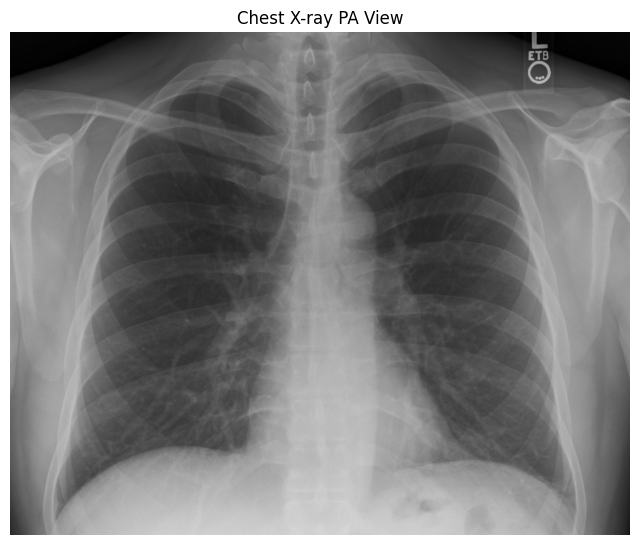

In [6]:
# Load chest X-ray image
image_url = "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"
image = Image.open(requests.get(image_url, headers={"User-Agent": "tutorial"}, stream=True).raw)

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Chest X-ray PA View')
plt.show()

### Task 1: General Description

Ask the model to describe what it sees in the X-ray:

In [7]:
# Create multimodal input (image + text)
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "Describe this chest X-ray. What do you see?"}
        ]
    }
]

# Run inference
output = pipe(text=messages, max_new_tokens=500)
print("Model Response:")
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Model Response:
Based on the chest X-ray, here's a description:

**Overall Impression:**

The image shows a normal chest X-ray with clear visualization of the heart, lungs, and bony structures. The patient is likely in a normal position.

**Key Findings:**

*   **Heart:** The heart size appears within normal limits, situated centrally.
*   **Lungs:** The lungs are clear, with no evidence of consolidation, nodules, or masses. The pulmonary vasculature is unremarkable.
*   **Bones:** The ribs, clavicles, and spine are intact, without any fractures or abnormalities.
*   **Mediastinum:** The mediastinum (the space between the lungs containing the heart, great vessels, trachea, etc.) appears normal in width and alignment.
*   **Pleura:** There is no evidence of pleural effusion or pneumothorax.

**Impression:**

Normal chest X-ray.

**Disclaimer:**

This interpretation is based solely on the provided image and does not constitute a definitive medical diagnosis. A complete assessment require

### Task 2: Disease Classification

Ask for specific clinical findings:

In [8]:
# Ask about specific conditions
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "Are there any signs of pneumonia, cardiomegaly, or pleural effusion in this chest X-ray? Provide a detailed analysis."}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500)
print("Disease Analysis:")
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Disease Analysis:
Based on the provided chest X-ray image, here's a detailed analysis:

**Overall Impression:**

The image shows a clear and relatively normal chest X-ray. There are no obvious signs of pneumonia, cardiomegaly, or pleural effusion.

**Detailed Analysis:**

*   **Lungs:** The lung fields appear clear, with no focal consolidation, infiltrates, or opacities to suggest pneumonia. There's no evidence of atelectasis.
*   **Heart:** The heart size appears normal, with no significant cardiomegaly. The cardiothoracic ratio is within normal limits.
*   **Pleura:** The pleural spaces are clear, with no pleural effusions or pneumothorax.
*   **Bones:** The bony structures of the rib cage and clavicles are visible.

**Conclusion:**

Based on the analysis, there are no clear indicators of pneumonia, cardiomegaly, or pleural effusion in this chest X-ray.

**Important Note:**

This is a preliminary interpretation based on a single image. A definitive diagnosis requires a thorough evalu

### Task 3: Anatomical Localization

Identify anatomical structures and their locations:

In [9]:
# Ask for anatomical analysis
messages = [
    {
        "role": "user",
        "content": [
            {"type": "image", "image": image},
            {"type": "text", "text": "Identify and describe the location of the heart, lungs, and any abnormalities in this chest X-ray."}
        ]
    }
]

output = pipe(text=messages, max_new_tokens=500)
print("Anatomical Analysis:")
print(output[0]["generated_text"][-1]["content"])

Setting `pad_token_id` to `eos_token_id`:1 for open-end generation.


Anatomical Analysis:
Based on the provided chest X-ray image, here's a description:

**Heart:** The heart appears to be in a normal position, located centrally in the chest, slightly to the left. The heart size seems within normal limits.

**Lungs:** The lungs are clear and appear to be well-expanded. There are no obvious signs of consolidation, nodules, or other significant abnormalities. The heart shadow is located in the center of the chest, and the lung markings are visible outside of it.

**Abnormalities:** There are no apparent abnormalities in this particular image.

**Disclaimer:** I am an AI and cannot provide medical diagnoses. A definitive interpretation of this chest X-ray should be performed by a qualified radiologist or healthcare professional.


## Model Capabilities

**What MedGemma 1.5 excels at:**
- Medical image classification and analysis
- 3D volumetric imaging (CT/MRI) - unique to this version
- Anatomical structure identification
- Medical Q&A and knowledge retrieval
- Document understanding and data extraction

**Performance highlights:**
- CT classification: 61% accuracy
- MRI classification: 65% accuracy
- MedQA: 69% accuracy
- EHR Q&A: 90% accuracy
- Fine-tuned version: 80% on imaging tasks (vs GPT-4: 70%)

---

## Important Limitations

⚠️ **Critical considerations:**

1. **Not for clinical diagnosis** - Outputs must be validated by medical professionals before any clinical use
2. **Prompt sensitivity** - Different phrasings can yield different results
3. **Single-image focus** - Primarily designed for individual images, limited multi-image evaluation
4. **Requires validation** - Always test on representative datasets for your specific use case
5. **Fine-tuning recommended** - Best results come from adapting to your domain

**For production use:**
- Validate on your target population and imaging equipment
- Fine-tune using techniques like LoRA or QLoRA
- Maintain clinician-in-the-loop workflows
- Test for bias across demographic groups

---

## Next Steps

**Explore further:**

1. **Try 3D imaging** - Use CT/MRI datasets to test volumetric capabilities
2. **Fine-tune the model** - Adapt to your specific medical imaging task using LoRA
3. **Use larger datasets** - Download NIH Chest X-ray dataset (100K+ images) or CheXpert
4. **Build applications** - Create medical imaging tools with local deployment

**Useful datasets:**
- [NIH Chest X-ray](https://www.kaggle.com/datasets/nih-chest-xrays/data) - 112K images, 14 diseases
- [CheXpert](https://aimi.stanford.edu/datasets/chexpert-chest-x-rays) - 224K chest radiographs
- [The Cancer Imaging Archive](https://www.cancerimagingarchive.net/) - CT/MRI datasets

**Resources:**
- [Model on HuggingFace](https://huggingface.co/google/medgemma-1.5-4b-it)
- [Official GitHub](https://github.com/Google-Health/medgemma)
- [Model Card & Documentation](https://developers.google.com/health-ai-developer-foundations/medgemma)
- [Research Blog Post](https://research.google/blog/next-generation-medical-image-interpretation-with-medgemma-15-and-medical-speech-to-text-with-medasr/)

---

## Citation

```bibtex
@article{sellergren2025medgemma,
  title={MedGemma Technical Report},
  author={Sellergren et al.},
  journal={arXiv preprint arXiv:2507.05201},
  year={2025}
}
```

---

**Like this tutorial?** Subscribe to the channel for more AI and machine learning content!